In [44]:
import json


model_names = ["gpt-4o-2024-05-13", "gpt-3.5-turbo-0125", "llama3:70b", "llama3:8b"]

models_context_sources = []

for model_name in model_names:
    print(model_name)
    file_name = f"../data/results/config2/all_dependencies_all_{model_name}.json"

    context_sources = []


    with open(file_name, "r", encoding="utf-8") as src:
        data = json.load(src)

    for entry in data:
        context = entry["context"]
        sources = [x["index"] for x in context]

        context_sources.append(sources)

    models_context_sources.append({
        model_name: context_sources
    })

gpt-4o-2024-05-13
gpt-3.5-turbo-0125
llama3:70b
llama3:8b


In [45]:
model_names = ["gpt-4o-2024-05-13", "gpt-3.5-turbo-0125", "llama3:70b", "llama3:8b"]

validation_models_context_sources = []

for model_name in model_names:
    print(model_name)
    file_name = f"../data/results/validation/validation_set_all_{model_name}.json"

    context_sources = []


    with open(file_name, "r", encoding="utf-8") as src:
        data = json.load(src)

    for entry in data:
        context = entry["context"]
        sources = [x["index"] for x in context]

        context_sources.append(sources)

    validation_models_context_sources.append({
        model_name: context_sources
    })

gpt-4o-2024-05-13
gpt-3.5-turbo-0125
llama3:70b
llama3:8b


In [46]:
refined_data = validation_models_context_sources[0]["gpt-4o-2024-05-13"]
                                                    
refined_data

[['so-posts', 'so-posts', 'so-posts', 'web-search', 'tech-docs'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'tech-docs'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'tech-docs'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'web-search'],
 ['so-posts', 'web-search', 'web-search', 'web-search', 'web-search'],
 ['web-search', 'web-search', 'web-search', 'tech-docs', 'web-search'],
 ['web-search', 'web-search', 'tech-docs', 'web-search', 'web-search'],
 ['web-search', 'tech-docs', 'web-search', 'web-search', 'web-search'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'web-search'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'so-posts'],
 ['web-search', 'web-search', 'web-search', 'tech-docs', 'web-search'],
 ['web-search', 'web-search', 'web-search', 'web-search', 'web-search'],
 ['tech-docs', 'web-search', 'web-search', 'web-search', 'web-search'],
 ['web-search', 'web-search', 'so-posts', 'so-posts', 'web-search'],


In [26]:
data = models_context_sources[0]["gpt-4o-2024-05-13"]

count=0
for x in data:
    if x[0] == "web-search":
        count += 1

print(count)

415


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

colors = ["#3E7F94", "#FFFFFF", "#C4583D"]  # Light blue to white to red
n_bins = 100  # Increase or decrease to change how smooth the color transitions are

# Create a custom colormap
custom_colormap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

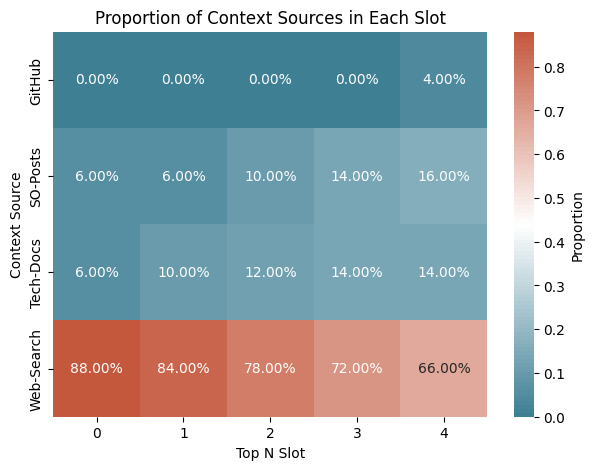

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = models_context_sources[0]["gpt-4o-2024-05-13"]

with open("context_sources.json", "w", encoding="utf-8") as dest:
    json.dump(data, dest, indent=2)

refined_data = validation_models_context_sources[0]["gpt-4o-2024-05-13"]


# Define a dictionary for replacements
replacements = {
    "tech-docs": "Tech-Docs",
    "so-posts": "SO-Posts",
    "github": "GitHub",
    "web-search": "Web-Search"
}

# Apply the replacements
updated_data = [
    [replacements.get(item, item) for item in sublist] for sublist in data
]

# Apply the replacements
updated_refined_data = [
    [replacements.get(item, item) for item in sublist] for sublist in refined_data
]


df = pd.DataFrame(updated_refined_data)

result = pd.DataFrame({
    slot: df[slot].value_counts(normalize=True) for slot in df.columns
}).fillna(0)  # Fill missing values with 0


# sns.color_palette("Set2")
# sns.cubehelix_palette(as_cmap=True)
#sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
# sns.light_palette("seagreen", as_cmap=True)

# Prepare the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(result, annot=True, cmap=custom_colormap, fmt=".2%", cbar_kws={'label': 'Proportion'})
plt.title("Proportion of Context Sources in Each Slot")
plt.xlabel("Top N Slot")
plt.ylabel("Context Source")
plt.savefig("context_refined.pdf")

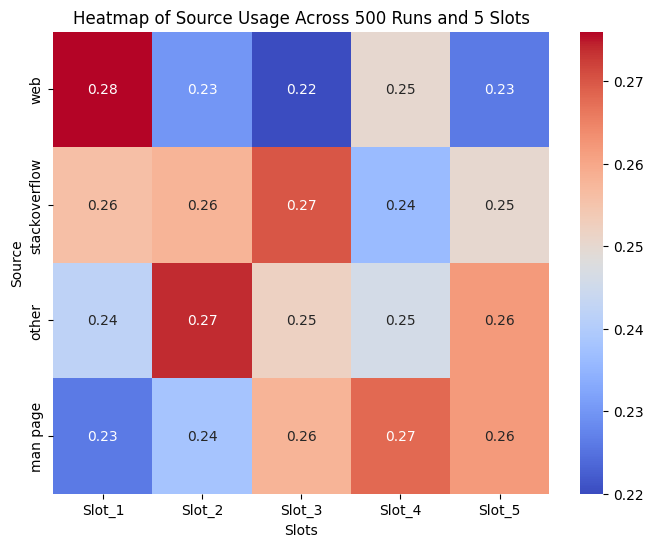

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example: Generate random data
sources = ['web', 'man page', 'stackoverflow', 'other']
runs = 500
slots = 5

# Simulating random data: 500 runs and 5 slots, with each slot having a random source
data = pd.DataFrame({
    f'Slot_{i+1}': pd.Categorical([np.random.choice(sources) for _ in range(runs)], categories=sources)
    for i in range(slots)
})
if False:
    # Count the occurrences of each source for each slot
    source_counts = pd.concat([data[f'Slot_{i+1}'].value_counts(normalize=True) for i in range(slots)], axis=1)

    # Plot the stacked bar chart
    source_counts.T.plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title('Fraction of Sources Used Across 500 Runs for Each Slot')
    plt.xlabel('Slots')
    plt.ylabel('Fraction of Source Usage')
    plt.legend(title='Source')
    plt.show()

if True:
    import seaborn as sns

    # Convert to a form suitable for heatmap (normalize=True gives fractions)
    source_counts = pd.concat([data[f'Slot_{i+1}'].value_counts(normalize=True) for i in range(slots)], axis=1)
    source_counts.columns = [f'Slot_{i+1}' for i in range(slots)]

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(source_counts, annot=True, cmap='coolwarm', cbar=True)
    plt.title('Heatmap of Source Usage Across 500 Runs and 5 Slots')
    plt.xlabel('Slots')
    plt.ylabel('Source')
    plt.show()